In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi

from analysis.config import birds, h5_path_dict, pickle_dir
from analysis.ExpData import ExpData
from analysis.utils import popln_overlap, get_fr

In [2]:
with open(pickle_dir / 'population_patterns_checks.p', 'rb') as f: 
    population_patterns = pickle.load(f)

In [3]:
def plot_overlaps(all_overlaps, title):
    plt.figure()
    plt.hist(all_overlaps, bins=20, alpha=0.4, weights=np.ones(len(all_overlaps)) / len(all_overlaps))
    plt.title(title, fontsize=14)
    plt.ylabel("Proportion of Visits", fontsize=12)
    plt.xlabel("Population Overlap", fontsize=12)
    plt.xlim((0, 1))
    plt.ylim((0, 0.6))
    plt.show()
    print(len(all_overlaps))

# Activity Overlap Between Caching and Checks of Occupied Cache

/home/chingf/Code/cache-arena-analysis/analysis/utils.py:56: RuntimeWarning: invalid value encountered in true_divide
  dist = adotb/(asumsq + bsumsq - adotb)
/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: All-NaN slice encountered


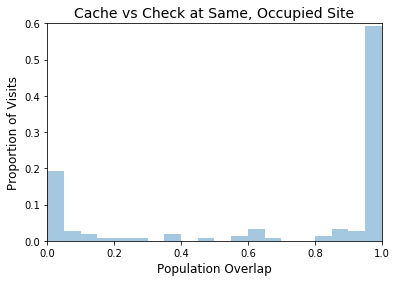

155


In [4]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    ch_visits = population_patterns[fil_string]['ch_visits']
    noncrch_visits = population_patterns[fil_string]['noncrch_visits']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    if ch_visits.size == 0: continue

    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.event_sites[exp_data.cache_event][i]
        cache_pattern_mat = visit_patterns[c_visit]
        for j, ch_visit in enumerate(ch_visits):
            ch_site = exp_data.event_sites[exp_data.check_event][j]
            if ch_site != c_site: continue
            if not exp_data.cache_present[ch_visit, c_site-1]: continue
            check_pattern_mat = visit_patterns[ch_visit]
            overlaps = []
            for check_pattern in check_pattern_mat.T:
                cache_check_overlap = popln_overlap(
                    cache_pattern_mat, check_pattern
                    )
                max_val = np.nanmax(cache_check_overlap)
                if not np.isnan(max_val):
                    overlaps.append(np.nanmax(cache_check_overlap))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))             
        
plot_overlaps(all_overlaps, "Cache vs Check at Same, Occupied Site")

# Activity Overlap Between Caching and Checks of Unoccupied Cache

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: All-NaN slice encountered


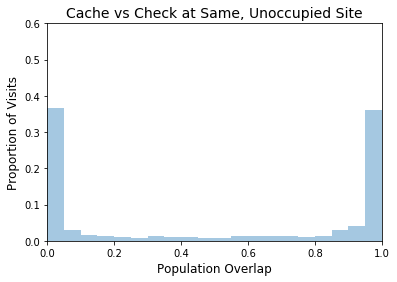

1087


In [5]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    ch_visits = population_patterns[fil_string]['ch_visits']
    noncrch_visits = population_patterns[fil_string]['noncrch_visits']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    if ch_visits.size == 0: continue

    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.event_sites[exp_data.cache_event][i]
        cache_pattern_mat = visit_patterns[c_visit]
        assert(ch_visits.size == np.sum(exp_data.check_event))
        for j, ch_visit in enumerate(ch_visits):
            ch_site = exp_data.event_sites[exp_data.check_event][j]
            if ch_site != c_site: continue
            if exp_data.cache_present[ch_visit, c_site-1]: continue
            check_pattern_mat = visit_patterns[ch_visit]
            overlaps = []
            for check_pattern in check_pattern_mat.T:
                cache_check_overlap = popln_overlap(
                    cache_pattern_mat, check_pattern
                    )
                max_val = np.nanmax(cache_check_overlap)
                if not np.isnan(max_val):
                    overlaps.append(np.nanmax(cache_check_overlap))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Cache vs Check at Same, Unoccupied Site")

# Activity Overlap Between Occupied vs Unoccupied Check

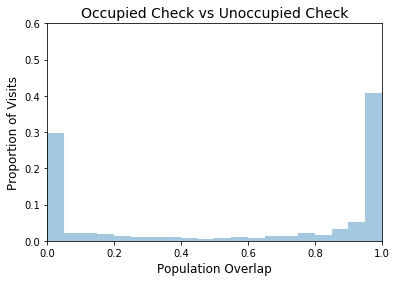

688


In [6]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    ch_visits = population_patterns[fil_string]['ch_visits']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    if ch_visits.size == 0: continue

    for i, ch_visit in enumerate(ch_visits):
        ch_site = exp_data.event_sites[exp_data.check_event][i]
        if not exp_data.cache_present[ch_visit, ch_site-1]: continue
        check_pattern_mat = visit_patterns[ch_visit]
        for j, ch2_visit in enumerate(ch_visits):
            if j <= i: continue
            ch2_site = exp_data.event_sites[exp_data.check_event][j]
            if ch_site != ch2_site: continue
            if exp_data.cache_present[ch2_visit, ch2_site-1]: continue
            check2_pattern_mat = visit_patterns[ch2_visit]
            overlaps = []
            for check2_pattern in check2_pattern_mat.T:
                check_check2_overlap = popln_overlap(
                    check_pattern_mat, check2_pattern
                    )
                max_val = np.nanmax(check_check2_overlap)
                if not np.isnan(max_val):
                    overlaps.append(np.nanmax(check_check2_overlap))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Occupied Check vs Unoccupied Check")

# Activity Overlap Between Occupied Checks and Arbitrary Visit

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: All-NaN slice encountered


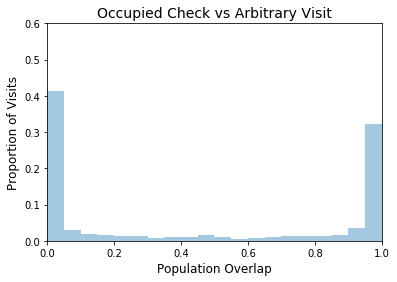

9086


In [7]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    ch_visits = population_patterns[fil_string]['ch_visits']
    noncrch_visits = population_patterns[fil_string]['noncrch_visits']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, ch_visit in enumerate(ch_visits):
        ch_site = exp_data.event_sites[exp_data.check_event][i]
        if not exp_data.cache_present[ch_visit, ch_site-1]: continue
        check_pattern_mat = visit_patterns[ch_visit]
        for j, noncrch_visit in enumerate(noncrch_visits):
            overlaps = []
            noncrch_site = exp_data.visit_wedges[noncrch_visit]
            if noncrch_site != ch_site: continue
            navig_pattern_mat = visit_patterns[noncrch_visit]
            for navig_pattern in navig_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(check_pattern_mat, navig_pattern)
                    ))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Occupied Check vs Arbitrary Visit")

# Activity Overlap Between Unoccupied Checks and Arbitrary Visit

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: All-NaN slice encountered
/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: All-NaN axis encountered
/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


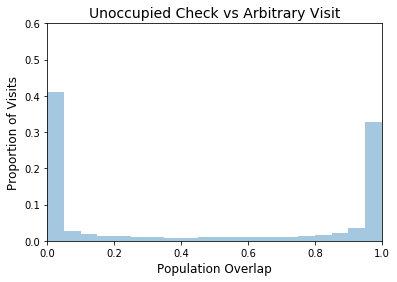

127263


In [8]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    ch_visits = population_patterns[fil_string]['ch_visits']
    noncrch_visits = population_patterns[fil_string]['noncrch_visits']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, ch_visit in enumerate(ch_visits):
        ch_site = exp_data.event_sites[exp_data.check_event][i]
        if exp_data.cache_present[ch_visit, ch_site-1]: continue
        check_pattern_mat = visit_patterns[ch_visit]
        for j, noncrch_visit in enumerate(noncrch_visits):
            overlaps = []
            noncrch_site = exp_data.visit_wedges[noncrch_visit]
            if noncrch_site != ch_site: continue
            navig_pattern_mat = visit_patterns[noncrch_visit]
            for navig_pattern in navig_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(check_pattern_mat, navig_pattern)
                    ))
            if len(overlaps) > 0:
                all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Unoccupied Check vs Arbitrary Visit")